In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
sales_df = pd.read_csv('advertising.csv')
print(sales_df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [3]:
print(sales_df.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [4]:
print(sales_df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [5]:
print(sales_df.dtypes)

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


In [6]:
print(sales_df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


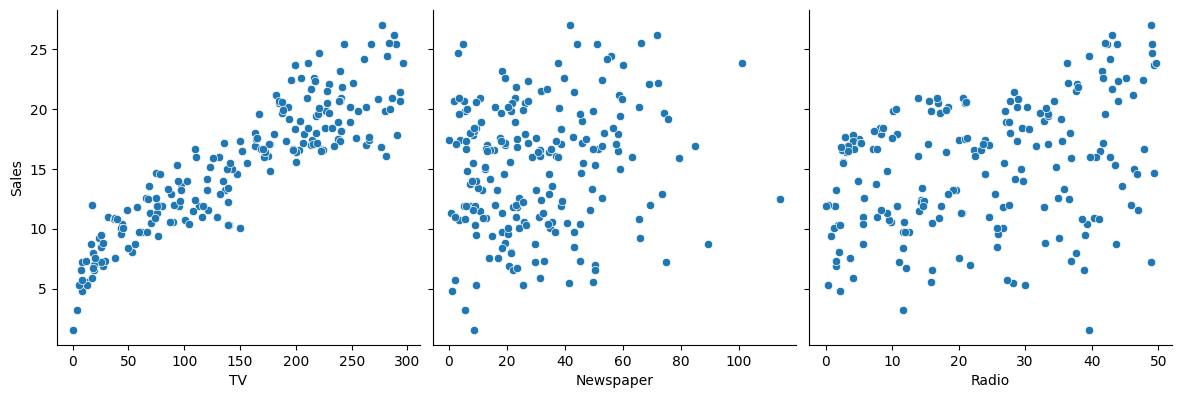

In [7]:
sns.pairplot(sales_df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

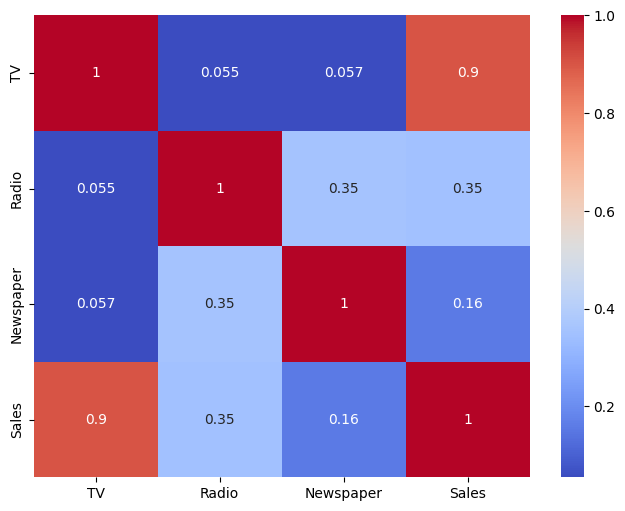

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(sales_df.corr(), annot=True, cmap='coolwarm')
plt.show()

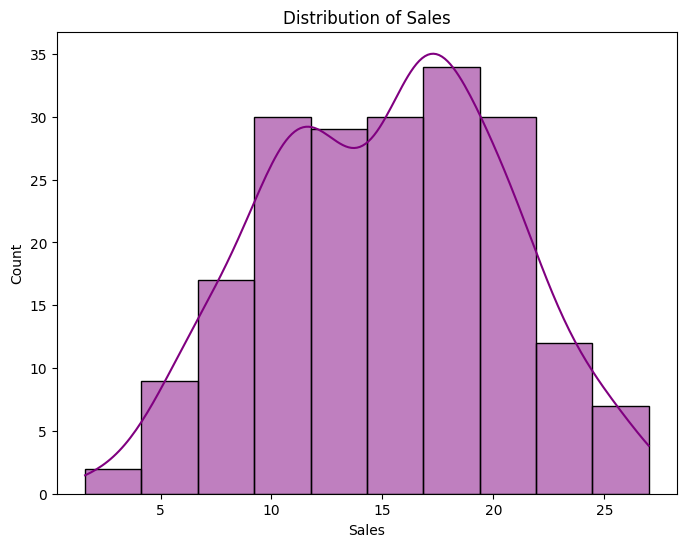

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(sales_df['Sales'], kde=True,color="purple")
plt.title('Distribution of Sales')
plt.show()

In [11]:
X = sales_df[['TV', 'Newspaper', 'Radio']]
y = sales_df['Sales']
print(X)

        TV  Newspaper  Radio
0    230.1       69.2   37.8
1     44.5       45.1   39.3
2     17.2       69.3   45.9
3    151.5       58.5   41.3
4    180.8       58.4   10.8
..     ...        ...    ...
195   38.2       13.8    3.7
196   94.2        8.1    4.9
197  177.0        6.4    9.3
198  283.6       66.2   42.0
199  232.1        8.7    8.6

[200 rows x 3 columns]


In [12]:
print(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160,) (40,)


In [14]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [15]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.05450927 0.00433665 0.10094536]
Intercept: 4.714126402214131


In [16]:
y_pred = model.predict(X_test)

In [17]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 1.2748262109549342
Mean Squared Error: 2.907756910271091
R-squared: 0.9059011844150826


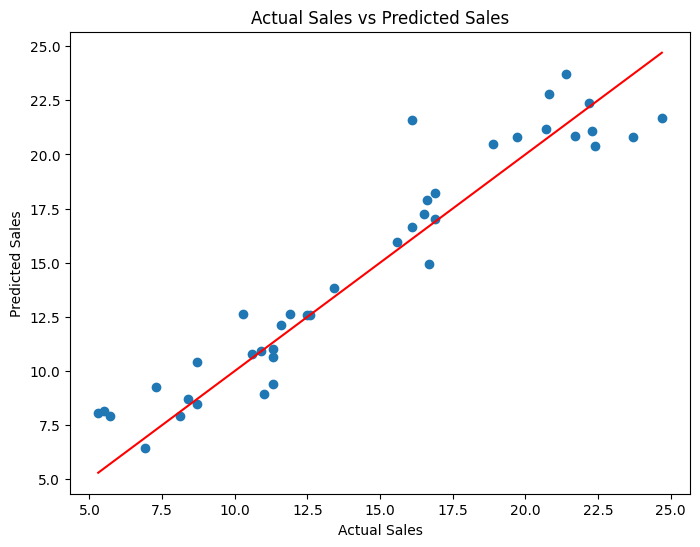

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs Predicted Sales")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.show()